# Time Series - 시계열 데이터

## Time series in Pandas

* 시간에 특화된 Groupby 기능이 필요함.
  * 예 : 데이터 중 주말 통계만 필요함 
* Time lag 또는 Moving Average는 어떻게 계산?
* Pandas에는 이에 특화된 기능을 제공함

# DataTimeIndex

## Datetime module in Python

* 날짜 데이터 처리를 위해 datetime 모듈을 활용

> from datetime import datetime

In [2]:
from datetime import datetime
date_str = '09-19-2018'

date_object = datetime.strptime(date_str, '%m-%d-%Y').date() # string parser time
print(type(date_object))
print(date_object) # printed in default formatting

<class 'datetime.date'>
2018-09-19


* strptime : string을 datetime object으로 바꿔 줌.
* 변환하는 string의 format을 설명해주어야 함.
* [datetime API](https://docs.python.org/ko/3/library/datetime.html)를 참고

In [7]:
print(date_object.day, date_object.month, date_object.year)

19 9 2018


* timedelta type

In [8]:
date_str_1 = '180919'
date_str_2 = '180925'

date_object_1 = datetime.strptime(date_str_1, '%y%m%d').date()
date_object_2 = datetime.strptime(date_str_2, '%y%m%d').date()

date_object_2 - date_object_1

datetime.timedelta(days=6)

## DateTime Index 만들기

* 대부분의 데이터는 str로 되어 있음
  * 호출 후 DateTime index로 변환이 필요함

* 아래는 csv 파일을 불러와서 처리 가능한 형식으로 만드는 과정임

In [3]:
import pandas as pd

In [4]:
def rename_date(x):
    return "-".join([value.strip() for value in x[:2]]) + "-01"

* `pd.to_datetime` : datetime type으로 바꾸어 줌

In [5]:
df = pd.read_csv('./imadeit.csv', encoding='cp949', sep='\t').T[1:].reset_index()
df = df.rename(columns = {"index":"date", 0:"지표", 1:"수치"})
df["date"] = df["date"].str.split(".").map(rename_date)
df["date"] = pd.to_datetime(df["date"], format = '%Y-%m-%d')
df["수치"] = df["수치"].astype(float)
df

,date,지표,수치
0,2016-01-01,경제활동인구,746.0
1,2016-01-01,취업자,722.0
2,2016-01-01,실업자,23.0
3,2016-02-01,경제활동인구,765.0
4,2016-02-01,취업자,700.0
5,2016-02-01,실업자,35.0
6,2016-03-01,경제활동인구,816.0
7,2016-03-01,취업자,898.0
8,2016-03-01,실업자,12.0


In [9]:
df_cross = pd.crosstab(
    index = df["date"],
    columns = df["지표"],
    values = df["수치"],
    aggfunc = sum
)

df_cross

지표,경제활동인구,실업자,취업자
date,,,
2016-01-01,746.0,23.0,722.0
2016-02-01,765.0,35.0,700.0
2016-03-01,816.0,12.0,898.0


<AxesSubplot:xlabel='date'>

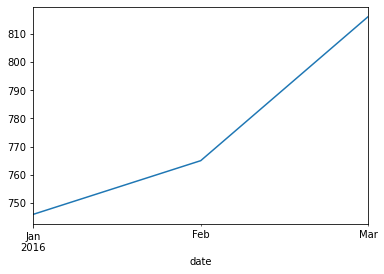

In [10]:
df_cross['경제활동인구'].plot()